In [1]:
# https://data36.com/polynomial-regression-python-scikit-learn/

In [32]:
import os
current_directory= os.getcwd()

c:\Vicky\Tu Braunschweig\Semester 3\Into to ML in engineering\VorlesungÜbung_Introduction_to_Machine_Learning_in_Engineering\Tutorials\T_04\To_Do


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Read the CSV file using Pandas
parent_directory = os.path.dirname(current_directory)
# print(parent_directory)
file_path = os.path.join(parent_directory,"machinery_data.csv")
df = pd.read_csv(file_path)

In [37]:
df

,Temperature,Performance
0,54.881350,-1352.988758
1,71.518937,-2333.914074
2,60.276338,-1631.132800
3,54.488318,-1336.385898
4,42.365480,-755.437983
...,...,...
95,18.319136,-106.022022
96,58.651293,-1552.067330
97,2.010755,-2.884801
98,82.894003,-3191.581176


In [38]:
# Split the data into training and testing sets
X = df[['Temperature']]
y = df['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [39]:
# Polynomial regression
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [40]:
# Fit the polynomial features to a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [41]:
# Generate predictions
y_pred = lin_reg.predict(X_test_poly)

In [42]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print("mse=",mse)
print("r2=",r2)

mse= 102.89840642176024
r2= 0.9999393292631217


In [44]:
# Plot the results
X_range = np.linspace(0, 100, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range = lin_reg.predict(X_range_poly)

C:\Users\vigne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


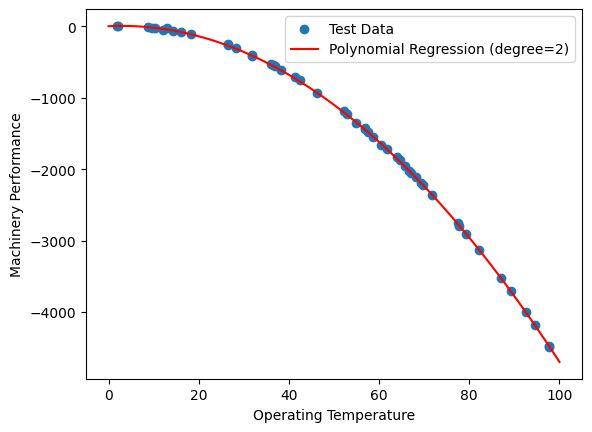

In [45]:
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_range, y_range, 'r-', label=f'Polynomial Regression (degree={degree})')
plt.xlabel('Operating Temperature')
plt.ylabel('Machinery Performance')
plt.legend()
plt.show()